In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv


In [3]:
# Load the dataset
file_path = '/kaggle/input/online-sales-dataset-popular-marketplace-data/Online Sales Data.csv' 
df = pd.read_csv(file_path)

In [4]:
df.head()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
0,10001,2024-01-01,Electronics,iPhone 14 Pro,2,999.99,1999.98,North America,Credit Card
1,10002,2024-01-02,Home Appliances,Dyson V11 Vacuum,1,499.99,499.99,Europe,PayPal
2,10003,2024-01-03,Clothing,Levi's 501 Jeans,3,69.99,209.97,Asia,Debit Card
3,10004,2024-01-04,Books,The Da Vinci Code,4,15.99,63.96,North America,Credit Card
4,10005,2024-01-05,Beauty Products,Neutrogena Skincare Set,1,89.99,89.99,Europe,PayPal


In [5]:
df.tail()

,Transaction ID,Date,Product Category,Product Name,Units Sold,Unit Price,Total Revenue,Region,Payment Method
235,10236,2024-08-23,Home Appliances,Nespresso Vertuo Next Coffee and Espresso Maker,1,159.99,159.99,Europe,PayPal
236,10237,2024-08-24,Clothing,Nike Air Force 1 Sneakers,3,90.00,270.00,Asia,Debit Card
237,10238,2024-08-25,Books,The Handmaid's Tale by Margaret Atwood,3,10.99,32.97,North America,Credit Card
238,10239,2024-08-26,Beauty Products,Sunday Riley Luna Sleeping Night Oil,1,55.00,55.00,Europe,PayPal
239,10240,2024-08-27,Sports,Yeti Rambler 20 oz Tumbler,2,29.99,59.98,Asia,Credit Card


In [6]:
df.describe()

,Transaction ID,Units Sold,Unit Price,Total Revenue
count,240.00000,240.000000,240.000000,240.000000
mean,10120.50000,2.158333,236.395583,335.699375
std,69.42622,1.322454,429.446695,485.804469
min,10001.00000,1.000000,6.500000,6.500000
25%,10060.75000,1.000000,29.500000,62.965000
50%,10120.50000,2.000000,89.990000,179.970000
75%,10180.25000,3.000000,249.990000,399.225000
max,10240.00000,10.000000,3899.990000,3899.990000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    240 non-null    int64  
 1   Date              240 non-null    object 
 2   Product Category  240 non-null    object 
 3   Product Name      240 non-null    object 
 4   Units Sold        240 non-null    int64  
 5   Unit Price        240 non-null    float64
 6   Total Revenue     240 non-null    float64
 7   Region            240 non-null    object 
 8   Payment Method    240 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 17.0+ KB


# Data Cleaning

In [8]:
# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Check for missing values
print(df.isnull().sum())

Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64


In [10]:
# Ensure correct data types
df['Units Sold'] = df['Units Sold'].astype(int)
df['Unit Price'] = df['Unit Price'].astype(float)
df['Total Revenue'] = df['Total Revenue'].astype(float)

In [11]:
# Check for duplicate rows
print(f'Duplicate rows: {df.duplicated().sum()}')
df = df.drop_duplicates()

Duplicate rows: 0


In [12]:
# Summary statistics
print(df.describe(include='all'))

        Transaction ID                 Date Product Category  \
count        240.00000                  240              240   
unique             NaN                  NaN                6   
top                NaN                  NaN      Electronics   
freq               NaN                  NaN               40   
mean       10120.50000  2024-04-29 12:00:00              NaN   
min        10001.00000  2024-01-01 00:00:00              NaN   
25%        10060.75000  2024-02-29 18:00:00              NaN   
50%        10120.50000  2024-04-29 12:00:00              NaN   
75%        10180.25000  2024-06-28 06:00:00              NaN   
max        10240.00000  2024-08-27 00:00:00              NaN   
std           69.42622                  NaN              NaN   

                       Product Name  Units Sold   Unit Price  Total Revenue  \
count                           240  240.000000   240.000000     240.000000   
unique                          232         NaN          NaN            N

# Data Visualization

## Sales Trends Over Time

In [13]:
# Aggregate sales data by date
sales_trends = df.groupby('Date')['Total Revenue'].sum().reset_index()

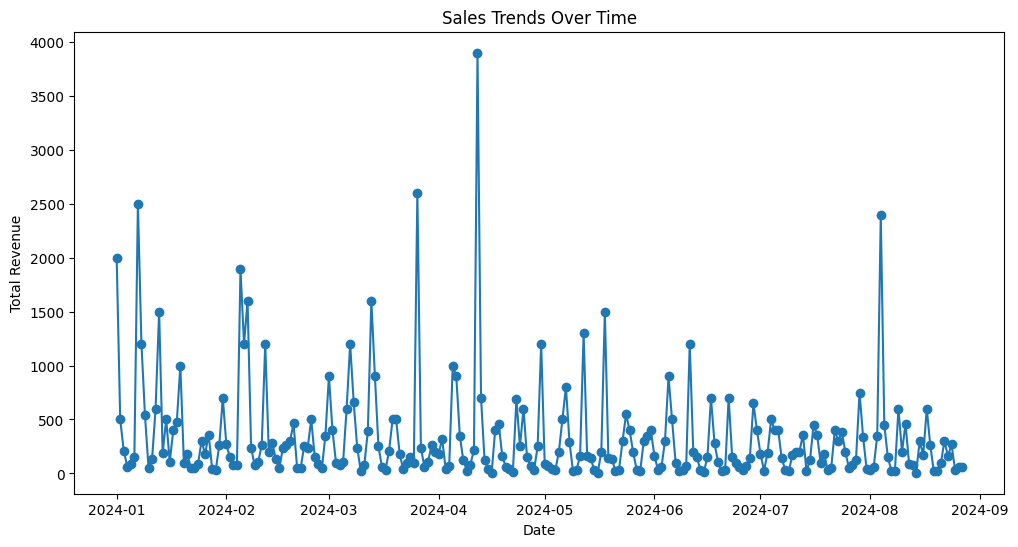

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sales trends over time
plt.figure(figsize=(12, 6))
plt.plot(sales_trends['Date'], sales_trends['Total Revenue'], marker='o')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [15]:
# Additional insights: Monthly trends
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Revenue'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

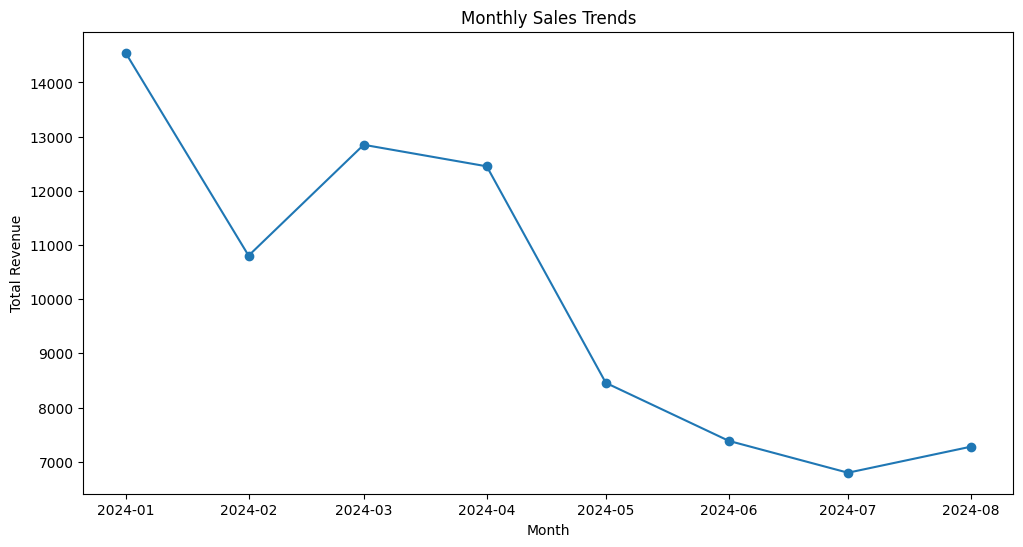

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Total Revenue'], marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.show()

## Product Category Popularity Across Regions

In [17]:
# Group by 'Region' and 'Product Category'
category_region_sales = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().unstack()

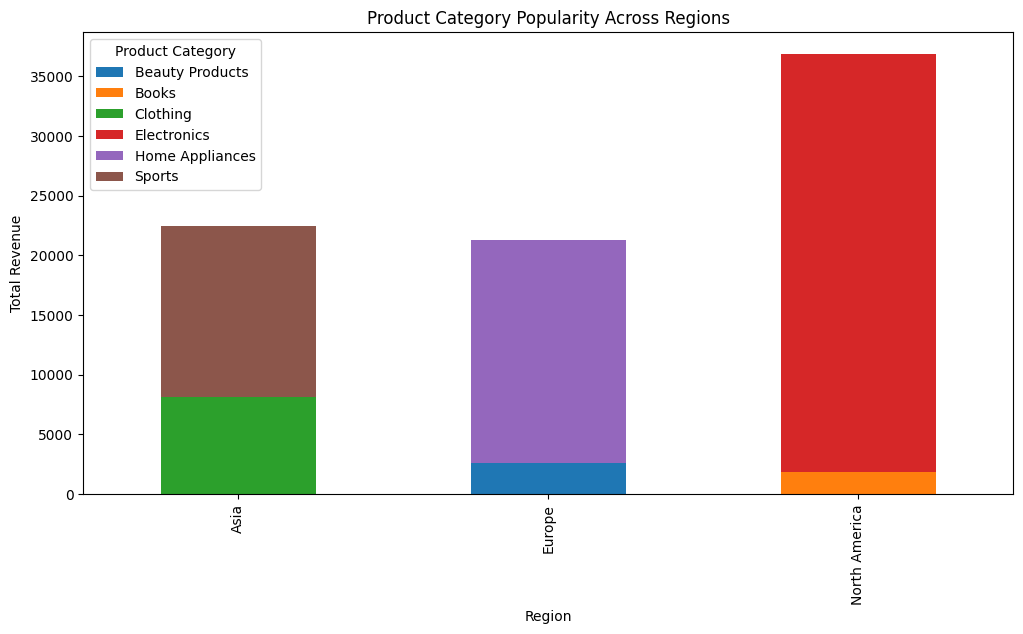

In [18]:
# Plot the distribution of sales across categories and regions
category_region_sales.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Product Category Popularity Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()

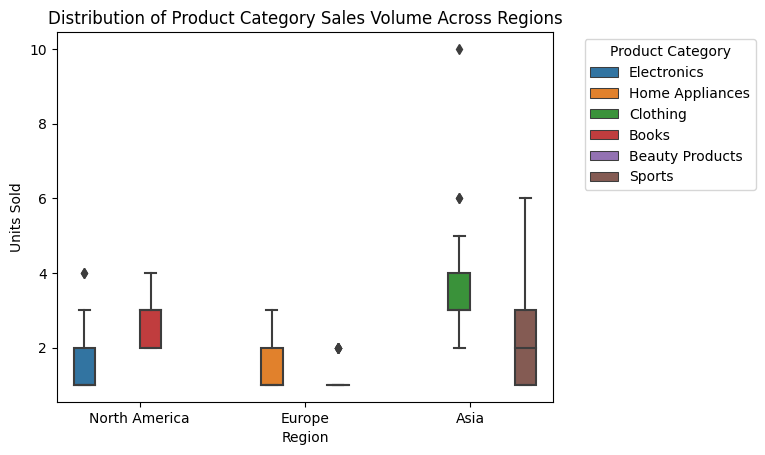

In [19]:
sns.boxplot(x='Region', y='Units Sold', hue='Product Category', data=df)
plt.title('Distribution of Product Category Sales Volume Across Regions')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Impact of Payment Methods on Sales

In [20]:
# Group by 'Payment Method'
payment_method_sales = df.groupby('Payment Method')['Total Revenue'].sum().reset_index()

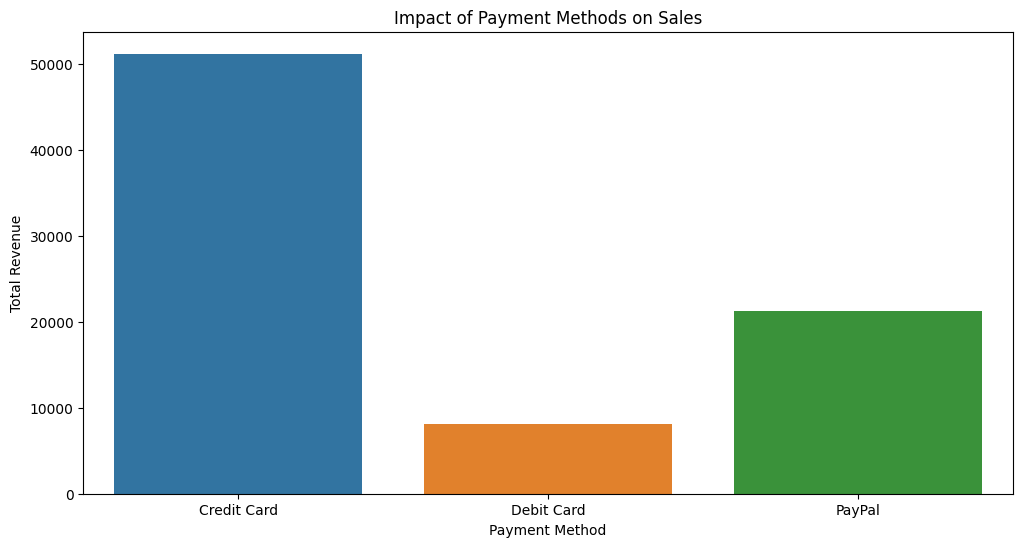

In [21]:
# Plot the impact of payment methods on sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Payment Method', y='Total Revenue', data=payment_method_sales)
plt.title('Impact of Payment Methods on Sales')
plt.xlabel('Payment Method')
plt.ylabel('Total Revenue')
plt.show()

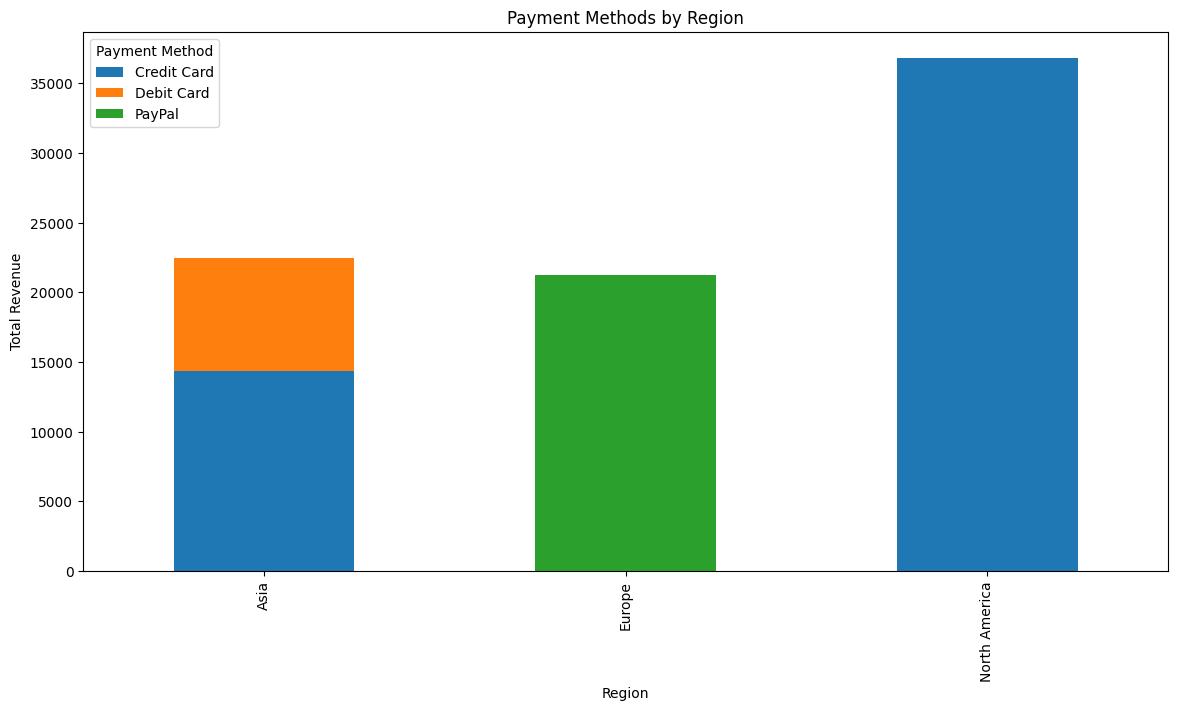

In [22]:
payment_region_sales = df.groupby(['Region', 'Payment Method'])['Total Revenue'].sum().unstack()
payment_region_sales.plot(kind='bar', stacked=True, figsize=(14, 7))
plt.title('Payment Methods by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Payment Method')
plt.show()

## Top-Selling Products within Each Category

In [23]:
# Identify top-selling products in each category
top_products = df.groupby(['Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()
top_products = top_products.sort_values(by='Total Revenue', ascending=False).groupby('Product Category').head(10)

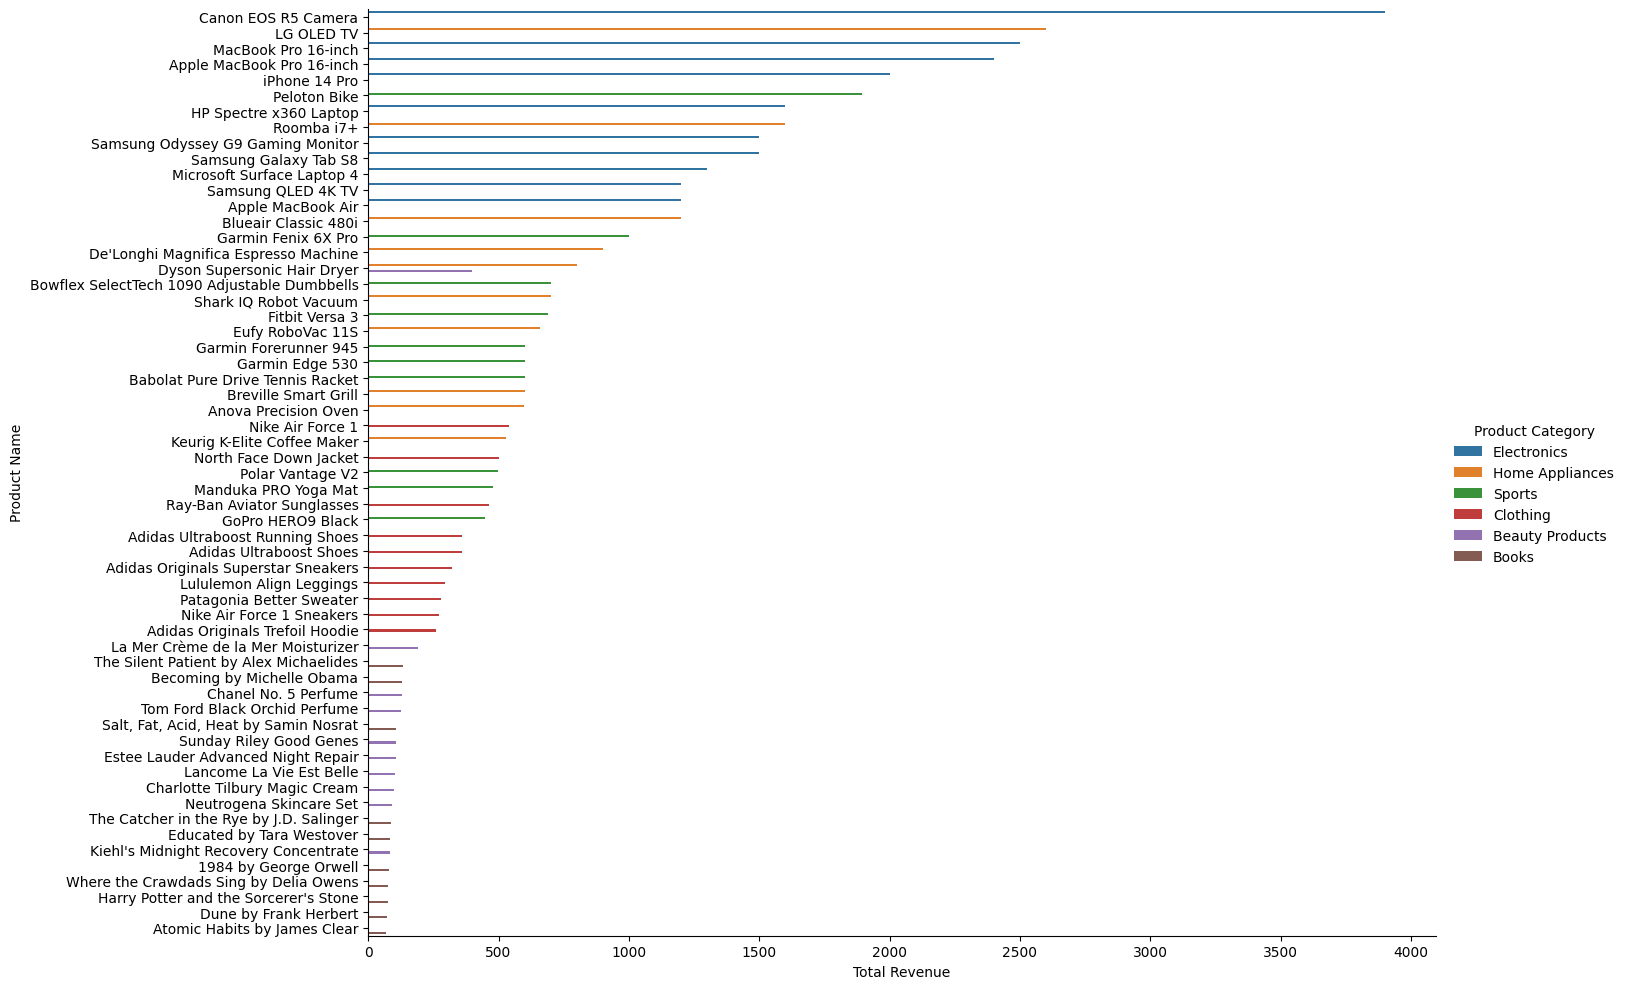

In [24]:
# Plot the top-selling products
g = sns.catplot(x='Total Revenue', y='Product Name', hue='Product Category', data=top_products, kind='bar', height=10, aspect=1.5)
g.set_titles('Top-Selling Products Within Each Category')
g.set_axis_labels('Total Revenue', 'Product Name')
plt.show()

In [25]:
# Additional insights: Top products by units sold
top_products_units = df.groupby(['Product Category', 'Product Name'])['Units Sold'].sum().reset_index()
top_products_units = top_products_units.sort_values(by='Units Sold', ascending=False).groupby('Product Category').head(10)

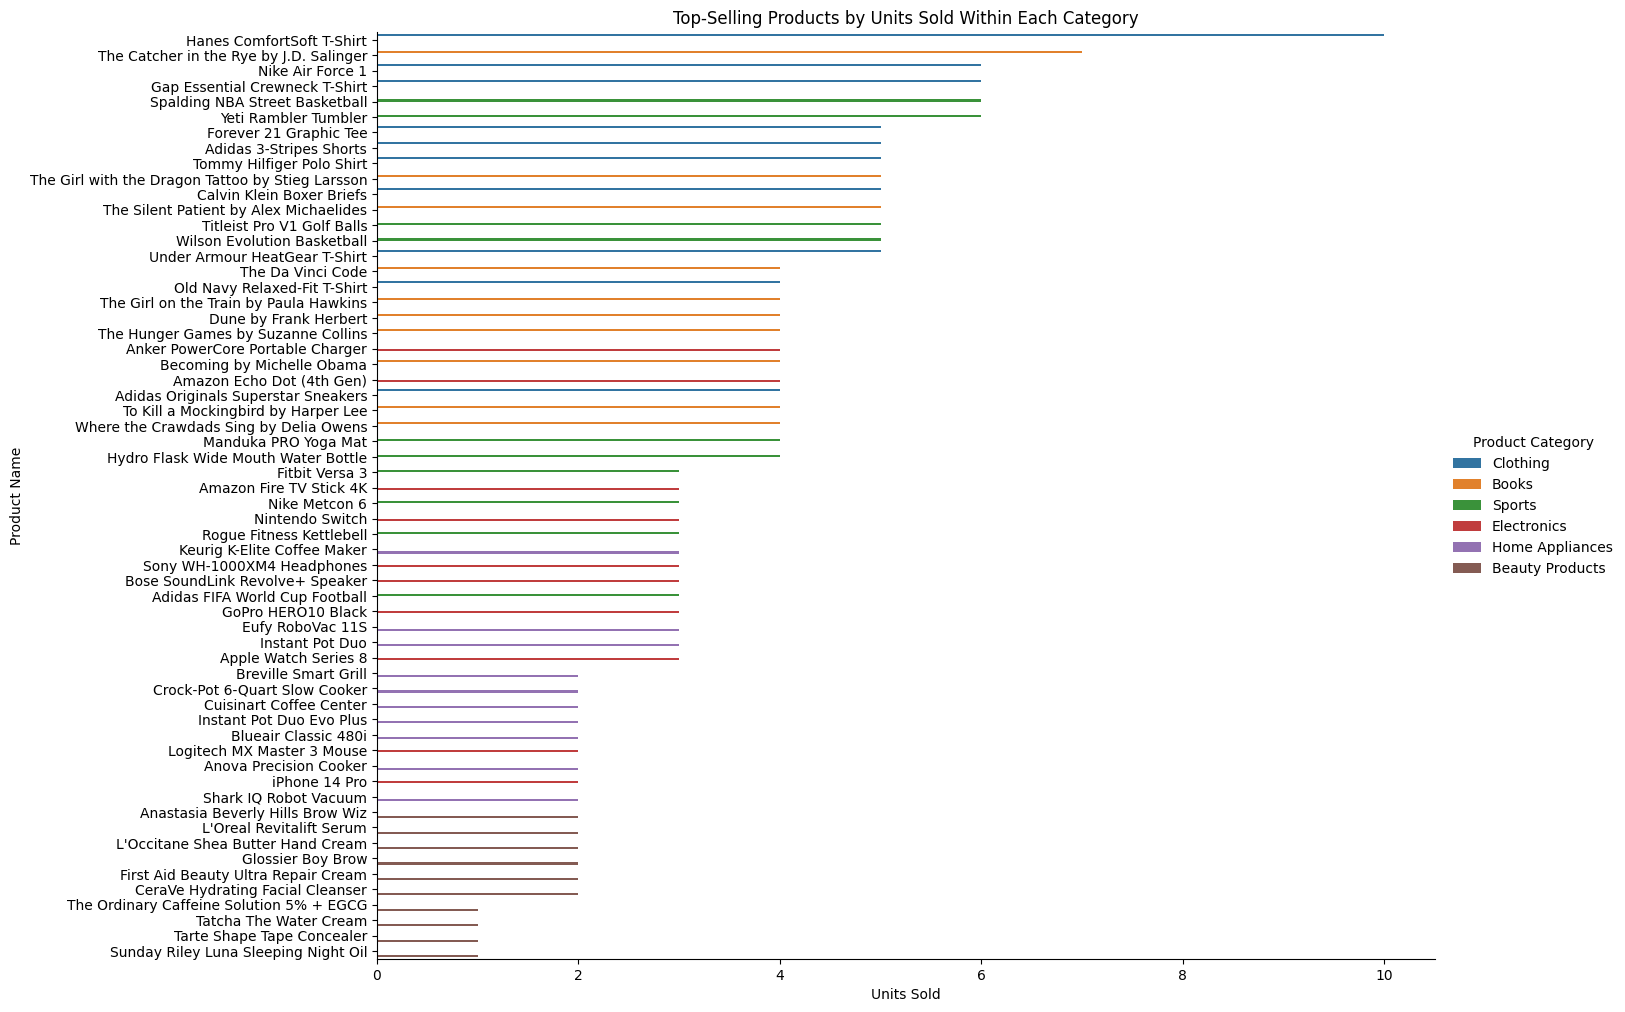

In [26]:
sns.catplot(x='Units Sold', y='Product Name', hue='Product Category', data=top_products_units, kind='bar', height=10, aspect=1.5)
plt.title('Top-Selling Products by Units Sold Within Each Category')
plt.xlabel('Units Sold')
plt.ylabel('Product Name')
plt.show()

## Performance of Products/Categories in Different Regions

In [27]:
# Compare performance of specific products/categories across regions
category_region_performance = df.groupby(['Region', 'Product Category'])['Total Revenue'].sum().reset_index()

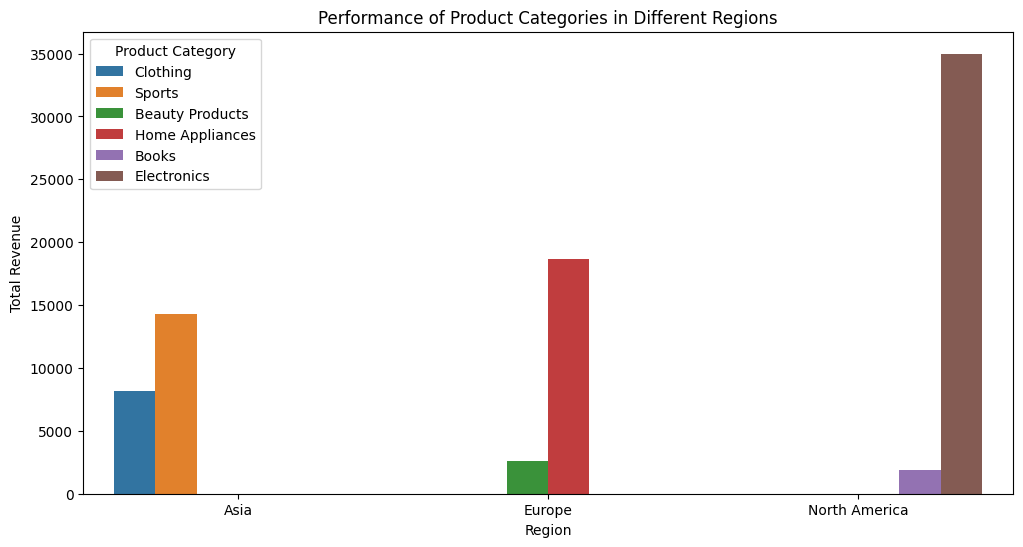

In [28]:
# Plot the performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Total Revenue', hue='Product Category', data=category_region_performance)
plt.title('Performance of Product Categories in Different Regions')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.legend(title='Product Category')
plt.show()

In [29]:
# Additional insights: Detailed performance of top products in each region
top_products_region = df.groupby(['Region', 'Product Category', 'Product Name'])['Total Revenue'].sum().reset_index()
top_products_region = top_products_region.sort_values(by='Total Revenue', ascending=False).groupby(['Region', 'Product Category']).head(10)

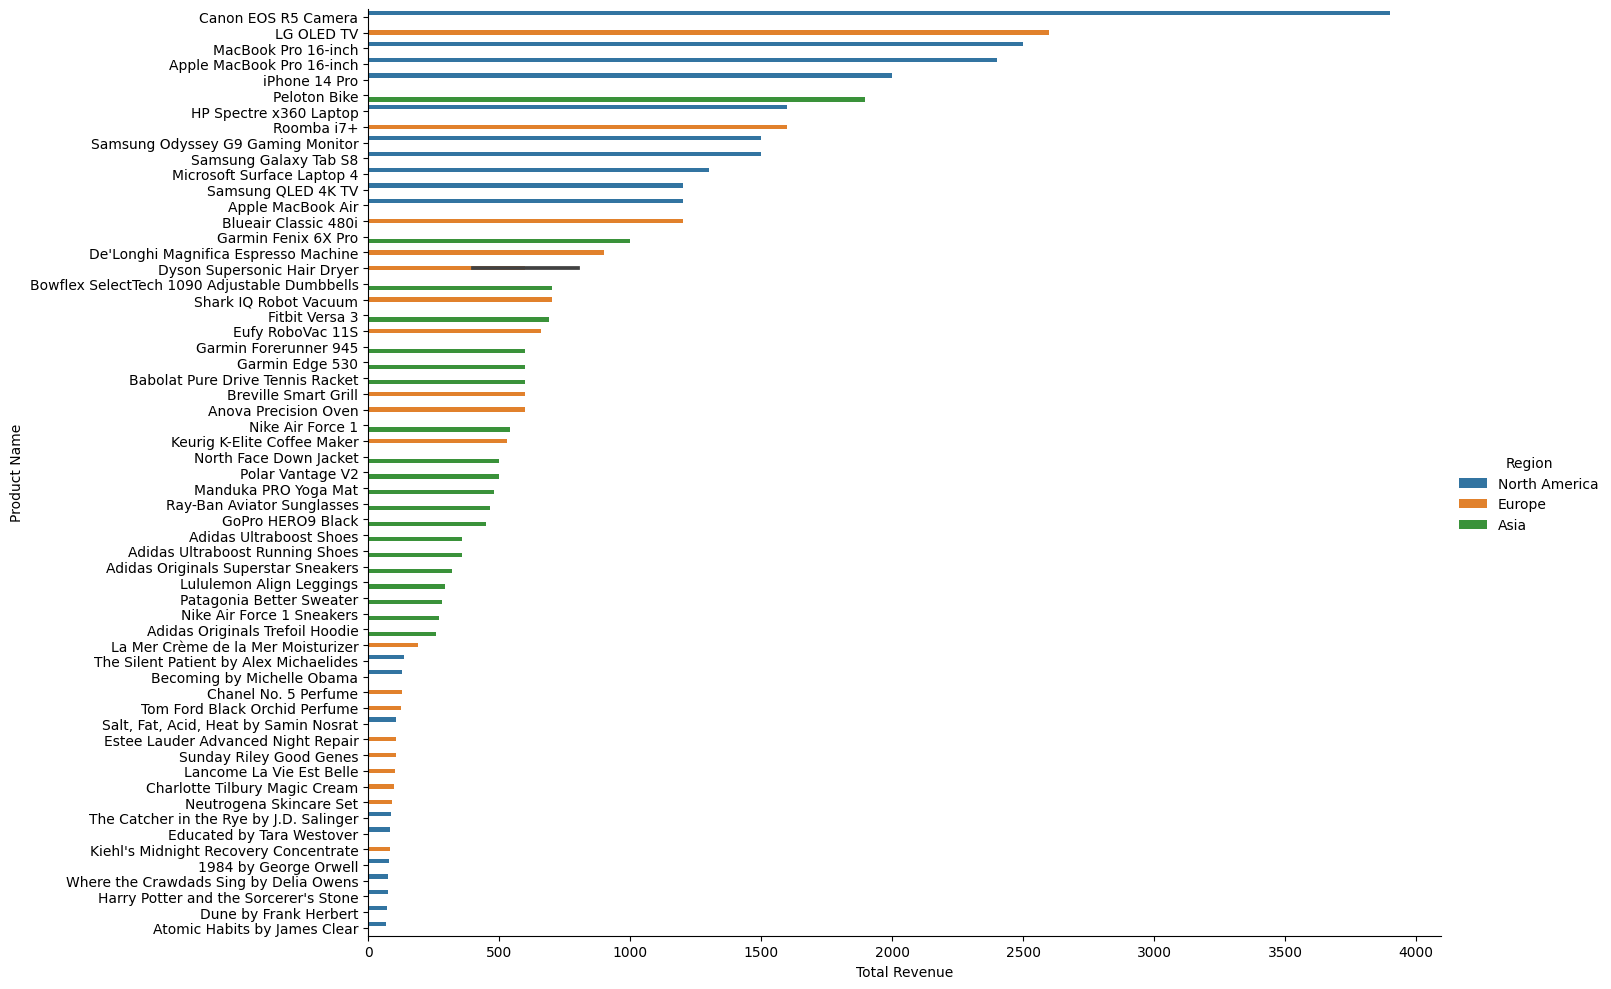

In [30]:
# Plot top products in each region
g = sns.catplot(x='Total Revenue', y='Product Name', hue='Region', data=top_products_region, kind='bar', height=10, aspect=1.5)
g.set_titles('Top Products in Each Region by Total Revenue')
g.set_axis_labels('Total Revenue', 'Product Name')
plt.show()